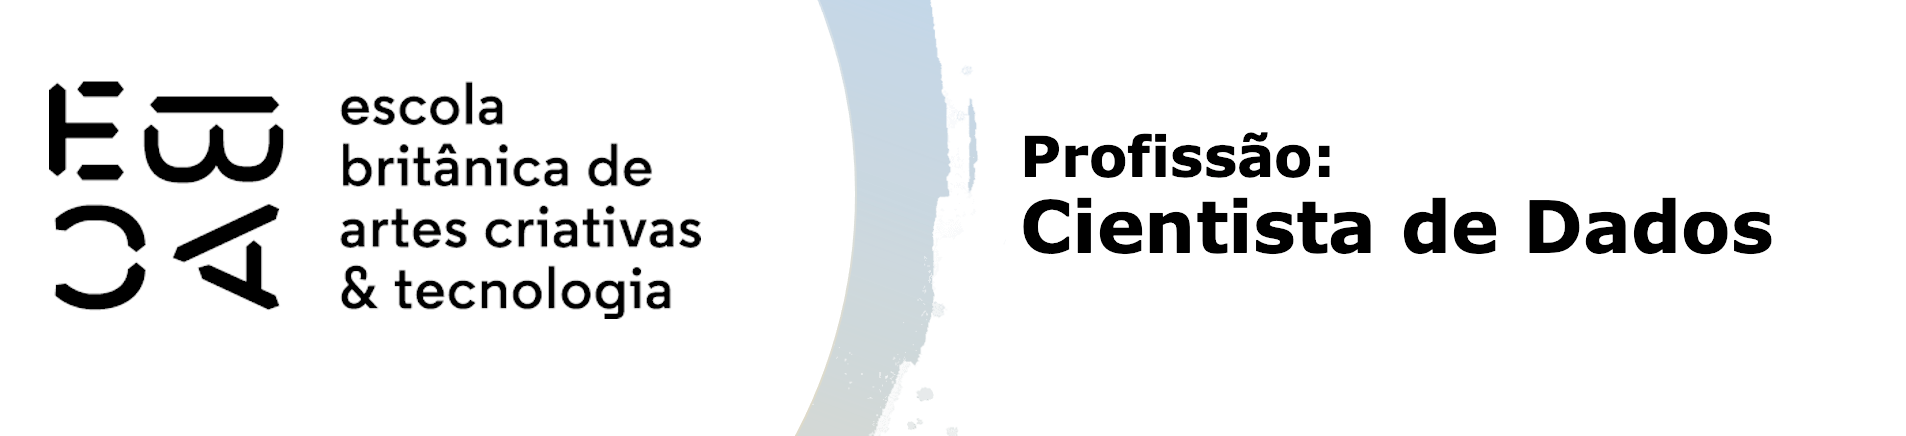

# Métodos hierárquicos de agrupamento - Tarefa

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [86]:
# Carregando a base
peng = sns.load_dataset('penguins')
peng = peng.dropna()

# Selecionando apenas as variáveis numéricas
peng_num = peng.select_dtypes('number').dropna()

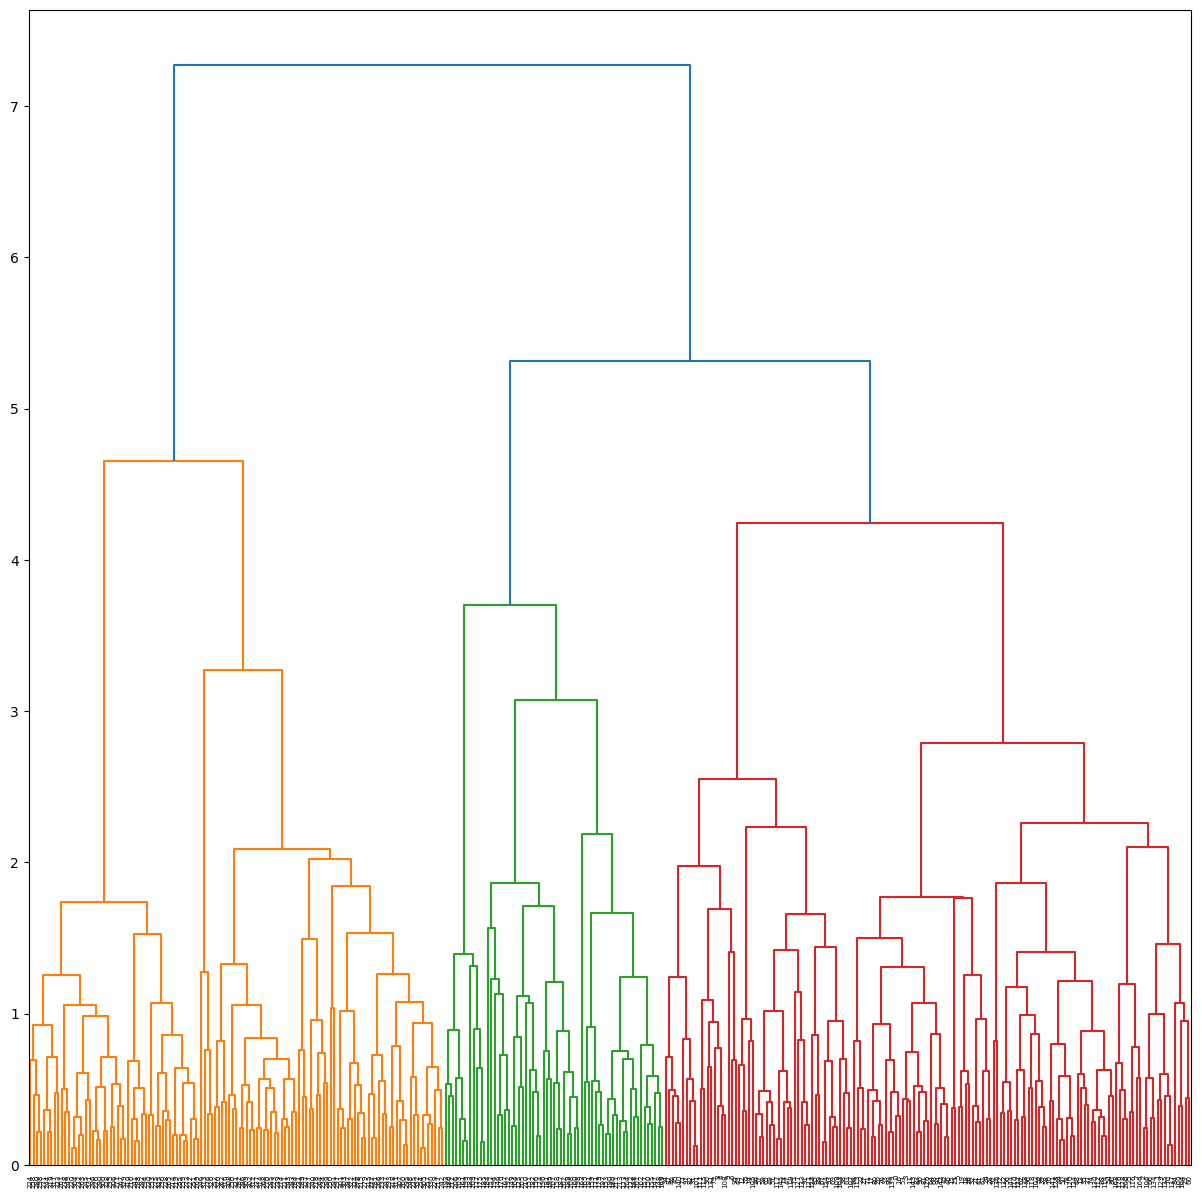

In [88]:
# Padronizando o dataset
padronizador = StandardScaler()
peng_pad = padronizador.fit_transform(peng_num)

#--------------------------------------------------#

# Configurando o tamanho e título do gráfico
plt.figure(figsize=(15,15))

# Criando o dendrograma
dend = shc.dendrogram(shc.linkage(peng_pad, method='complete'))

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [91]:
clus = AgglomerativeClustering(
    linkage='complete',
    distance_threshold=None,
    n_clusters=3
)

# Ajustando o modelo
labels = clus.fit_predict(peng_pad)

# Adicionando os rótulos de cluster ao DataFrame original
peng_num["Cluster"] = labels
peng_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Cluster
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,1


### - Quantos pinguins de cada espécie há em cada grupo?

- ```Grupo 0```: 123 Gentoo
- ```Grupo 1```: 151 Adelie e 14 Chinstrap
- ```Grupo 2```: 54 Chinstrap

In [94]:
pd.crosstab(peng['species'], peng_num['Cluster'])

Cluster,0,1,2
species,,,
Adelie,0,145,1
Chinstrap,0,6,62
Gentoo,119,0,0


In [96]:
pd.crosstab([peng["species"], peng["sex"]], peng_num["Cluster"])

Cluster            0   1   2
species   sex               
Adelie    Female   0  73   0
          Male     0  72   1
Chinstrap Female   0   6  28
          Male     0   0  34
Gentoo    Female  58   0   0
          Male    61   0   0

### - Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

#### *Grupo 0* - Gentoo
- Bicos mais compridos (47/48 mm) e menos profundos (15 mm).
- Nadadeiras mais longas (217 mm).
- Maior massa corporal (5.000 g).
- Representa a espécie mais robusta.

#### *Grupo 1* - Adelie
- Bicos mais curtos (39 mm) e mais profundos (18 mm).
- Nadadeiras curtas (190 mm).
- Massa corporal intermediária (3.700 g).
- Espécie mais compacta.

#### *Grupo 2* - Chinstrap
- Bicos longos (49 mm) e profundos (18 mm).
- Nadadeiras médias (196 mm).
- Massa corporal próxima à do Adelie (3.700 g).
- Mistura porque Chinstrap e Adelie têm medidas corporais próximas, mas a nadadeira diferencia.

In [99]:
peng_num.groupby("Cluster").mean()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
Cluster,,,,
0,47.568067,14.996639,217.235294,5092.436975
1,38.958278,18.297351,189.947020,3696.357616
2,49.306349,18.546032,196.650794,3758.730159


## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [140]:
new_df = peng_pad.copy()
new_df_num = peng_num.copy()

new_clus =  AgglomerativeClustering(
            linkage='complete',
            distance_threshold=None,
            n_clusters=6
)

# Ajustando o modelo
new_labels = new_clus.fit_predict(new_df)

# Adicionando os rótulos de cluster ao DataFrame original
new_df_num["Cluster"] = new_labels
new_df_num.head(2)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Cluster
0,39.1,18.7,181.0,3750.0,2
1,39.5,17.4,186.0,3800.0,2


## Quantos pinguins de cada espécie e sexo constam em cada grupo?

- ```Cluster 0```: 70 Chinstrap, 9 fêmeas e 61 machos.
- ```Cluster 1```: 51 Gentoo, 28 fêmeas e 23  machos.
- ```Cluster 2```: 92 Adelie e 5 Chinstrap, 77 fêmeas e 20 machos
- ```Cluster 3```: 49 Gentoo, 49 fêmeas.
- ```Cluster 4```: 53 Adelie e 1 Chinstrap, 52 machos e 2 fêmea.
- ```Cluster 5```: 12 Chinstrap, 12 fêmeas

In [147]:
pd.crosstab(peng['species'], new_df_num['Cluster'])

Cluster,0,1,2,3,4,5
species,,,,,,
Adelie,0,1,92,0,53,0
Chinstrap,0,50,5,0,1,12
Gentoo,70,0,0,49,0,0


In [149]:
pd.crosstab([peng["species"], peng["sex"]], new_df_num["Cluster"])

Cluster            0   1   2   3   4   5
species   sex                           
Adelie    Female   0   0  72   0   1   0
          Male     0   1  20   0  52   0
Chinstrap Female   0  28   5   0   1   0
          Male     0  22   0   0   0  12
Gentoo    Female   9   0   0  49   0   0
          Male    61   0   0   0   0   0

In [151]:
# Agrupamento dividido por sexo (%)

tab = pd.crosstab([peng["species"], peng["sex"]], new_df_num["Cluster"])
tabela_perc = tab.div(tab.sum(axis=0), axis=1) * 100
tabela_perc.round(2)

Cluster               0      1      2      3      4      5
species   sex                                             
Adelie    Female   0.00   0.00  74.23    0.0   1.85    0.0
          Male     0.00   1.96  20.62    0.0  96.30    0.0
Chinstrap Female   0.00  54.90   5.15    0.0   1.85    0.0
          Male     0.00  43.14   0.00    0.0   0.00  100.0
Gentoo    Female  12.86   0.00   0.00  100.0   0.00    0.0
          Male    87.14   0.00   0.00    0.0   0.00    0.0

In [153]:
new_df_num.groupby("Cluster").mean()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
Cluster,,,,
0,49.260000,15.624286,221.042857,5414.642857
1,48.760784,18.243137,194.431373,3650.980392
2,37.917526,17.726804,187.154639,3434.793814
3,45.151020,14.100000,211.795918,4632.142857
4,40.827778,19.322222,194.962963,4166.203704
5,51.625000,19.833333,206.083333,4216.666667


### Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

O agrupamento em **6 clusters** conseguiu evidenciar o **dimorfismo sexual** — a diferença física entre machos e fêmeas.  

Embora a separação não seja perfeita (no **cluster 0**, por exemplo, há uma proporção equilibrada entre os sexos), em comparação com a solução de **3 clusters**, esta abordagem traz **mais riqueza de informação**, permitindo distinguir em grande parte os grupos de acordo com o **sexo**, principalmente pela variável **`body_mass_g`**.  

#### Distribuição por espécie e sexo:
- **Gentoo** → Cluster 0 (**machos**) e Cluster 3 (**fêmeas**)  
- **Adelie** → Cluster 2 (**fêmeas**) e Cluster 4 (**machos**)  
- **Chinstrap** → Cluster 1 (**machos**) e Cluster 5 (**fêmeas**)  
